In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
daily_pB = pd.read_csv('Resources/daily_pB.csv',index_col=False)

In [3]:
daily_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 5 columns):
datestring                             2334 non-null int64
average_exhaustion                     2334 non-null float64
average_sA                             2334 non-null float64
average_percent_extracted_per_point    2334 non-null float64
pB                                     2334 non-null float64
dtypes: float64(4), int64(1)
memory usage: 91.3 KB


In [4]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pB[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = daily_pB['pB'].values.reshape(-1,1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [9]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [10]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [11]:
grid.fit(X_train_scaled, y_train_array)

C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.576, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.620, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.594, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.576, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.620, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.594, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [12]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.0001}
0.5963522367688513


In [13]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
             'epsilon':[0.001,0.01,0.1,1]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [14]:
grid.fit(X_train_scaled, y_train_array)

C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=1, epsilon=0.001, gamma=0.0001 ................................
[CV] .... C=1, epsilon=0.001, gamma=0.0001, score=0.255, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.0001 ................................
[CV] .... C=1, epsilon=0.001, gamma=0.0001, score=0.273, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.0001 ................................
[CV] .... C=1, epsilon=0.001, gamma=0.0001, score=0.228, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.567, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.593, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.576, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1

[CV] ....... C=5, epsilon=0.1, gamma=0.001, score=0.625, total=   0.0s
[CV] C=5, epsilon=0.1, gamma=0.001 ...................................
[CV] ....... C=5, epsilon=0.1, gamma=0.001, score=0.609, total=   0.0s
[CV] C=5, epsilon=0.1, gamma=0.01 ....................................
[CV] ........ C=5, epsilon=0.1, gamma=0.01, score=0.718, total=   0.0s
[CV] C=5, epsilon=0.1, gamma=0.01 ....................................
[CV] ........ C=5, epsilon=0.1, gamma=0.01, score=0.686, total=   0.0s
[CV] C=5, epsilon=0.1, gamma=0.01 ....................................
[CV] ........ C=5, epsilon=0.1, gamma=0.01, score=0.699, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.0001 ....................................
[CV] ........ C=5, epsilon=1, gamma=0.0001, score=0.339, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.0001 ....................................
[CV] ........ C=5, epsilon=1, gamma=0.0001, score=0.349, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.0001 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [15]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.01, 'gamma': 0.01}
0.7084274921057873


In [19]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
             'epsilon':[0.001,0.01,0.1,1],
             'coef0':[min(X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [20]:
grid.fit(X_train_scaled, y_train_array)

C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001, score=-2.548, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001, score=-2.494, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001, score=-2.390, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.001, score=-146.245, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.001, score=-136.997, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree

[CV]  C=1, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01, score=-23.841, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=1, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01, score=-7.168, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=1, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01, score=-21.367, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001 
[CV]  C=1, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001, score=0.566, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001 
[CV]  C=1, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001, score=0.601, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001 
[CV]  C=1, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001, score=0.579, total=   0.0s
[CV] C=1, coef0=-2.9582316784

[CV]  C=1, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.001, score=-37269.486, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01 ..
[CV]  C=1, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01, score=-4054012.305, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01 ..
[CV]  C=1, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01, score=-3732765.191, total=   0.0s
[CV] C=1, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01 ..
[CV]  C=1, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01, score=-3694034.185, total=   0.0s
[CV] C=1, coef0=9.05769492931081, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=1, coef0=9.05769492931081, degree=2, epsilon=0.001, gamma=0.0001, score=0.559, total=   0.0s
[CV] C=1, coef0=9.05769492931081, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=1, coef0=9.05769492931081, degree=2, epsilon=0.001, gamma=0.0001, score=0.589, total=   0.0s
[CV] C=1, coef0=9.057694

[CV]  C=1, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.001, score=0.620, total=   0.0s
[CV] C=1, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.01 .
[CV]  C=1, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.01, score=0.714, total=   0.1s
[CV] C=1, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.01 .
[CV]  C=1, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.01, score=0.682, total=   0.1s
[CV] C=1, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.01 .
[CV]  C=1, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.01, score=0.693, total=   0.1s
[CV] C=1, coef0=9.05769492931081, degree=3, epsilon=0.1, gamma=0.0001 
[CV]  C=1, coef0=9.05769492931081, degree=3, epsilon=0.1, gamma=0.0001, score=0.578, total=   0.0s
[CV] C=1, coef0=9.05769492931081, degree=3, epsilon=0.1, gamma=0.0001 
[CV]  C=1, coef0=9.05769492931081, degree=3, epsilon=0.1, gamma=0.0001, score=0.620, total=   0.0s
[CV] C=1, coef0=9.05769492931081, degree=3, epsilon=0.

[CV]  C=1, coef0=9.05769492931081, degree=4, epsilon=1, gamma=0.01, score=0.700, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001, score=-39.525, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001, score=-37.830, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.0001, score=-37.088, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.001, score=-3393.465, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=-2.958231678424269, degree=2, epsilon=0.001, gamma=0.001, score=-3126.463, total=   0.0s
[CV] 

[CV]  C=5, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.001, score=0.524, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01, score=-487.410, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01, score=-178.369, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=-2.958231678424269, degree=3, epsilon=0.01, gamma=0.01, score=-405.363, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001 
[CV]  C=5, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001, score=0.574, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001 
[CV]  C=5, coef0=-2.958231678424269, degree=3, epsilon=0.1, gamma=0.0001, score=0.619, total=   0.0s
[CV] C=5, coef0=-2.9582316

[CV]  C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.001, score=-935521.667, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.001 .
[CV]  C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.001, score=-926979.645, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01 ..
[CV]  C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01, score=-101399205.709, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01 ..
[CV]  C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01, score=-93267068.264, total=   0.0s
[CV] C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01 ..
[CV]  C=5, coef0=-2.958231678424269, degree=4, epsilon=1, gamma=0.01, score=-92305866.116, total=   0.0s
[CV] C=5, coef0=9.05769492931081, degree=2, epsilon=0.001, gamma=0.0001 
[CV]  C=5, coef0=9.05769492931081, degree=2, epsilon=0.001, gamma=0.0001, score=0.573, total=   0.0s
[CV] C=5, coef0=9.

[CV]  C=5, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.01, score=0.699, total=   0.3s
[CV] C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.0001 
[CV]  C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.0001, score=0.573, total=   0.0s
[CV] C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.0001 
[CV]  C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.0001, score=0.622, total=   0.0s
[CV] C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.0001 
[CV]  C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.0001, score=0.595, total=   0.0s
[CV] C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.001, score=0.670, total=   0.1s
[CV] C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=9.05769492931081, degree=3, epsilon=0.01, gamma=0.001, score=0.658, total=   0.1s
[CV] C=5, coef0=9.05769492931081, degree=3, e

[CV]  C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.001, score=0.715, total=   0.2s
[CV] C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.001 .
[CV]  C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.001, score=0.682, total=   0.2s
[CV] C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.001 .
[CV]  C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.001, score=0.688, total=   0.3s
[CV] C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.01 ..
[CV]  C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.01, score=0.744, total=   1.1s
[CV] C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.01 ..
[CV]  C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.01, score=0.700, total=   1.2s
[CV] C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.01 ..
[CV]  C=5, coef0=9.05769492931081, degree=4, epsilon=0.1, gamma=0.01, score=0.718, total=   1.1s
[CV] C=5, coef0=9.05769492931081, degree=4, epsilon=1, gamma

[CV]  C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.0001, score=0.593, total=   0.0s
[CV] C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.001, score=0.301, total=   0.1s
[CV] C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.001, score=0.528, total=   0.1s
[CV] C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.001, score=0.399, total=   0.0s
[CV] C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.01, score=-2026.416, total=   0.0s
[CV] C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=-2.958231678424269, degree=3, epsilon=0.001, gamma=0.01, score=-722.413, total=   0.0s
[CV

[CV]  C=10, coef0=-2.958231678424269, degree=4, epsilon=0.01, gamma=0.001, score=-3705669.806, total=   0.0s
[CV] C=10, coef0=-2.958231678424269, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=10, coef0=-2.958231678424269, degree=4, epsilon=0.01, gamma=0.01, score=-405621271.917, total=   0.0s
[CV] C=10, coef0=-2.958231678424269, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=10, coef0=-2.958231678424269, degree=4, epsilon=0.01, gamma=0.01, score=-373042251.321, total=   0.0s
[CV] C=10, coef0=-2.958231678424269, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=10, coef0=-2.958231678424269, degree=4, epsilon=0.01, gamma=0.01, score=-369200974.250, total=   0.0s
[CV] C=10, coef0=-2.958231678424269, degree=4, epsilon=0.1, gamma=0.0001 
[CV]  C=10, coef0=-2.958231678424269, degree=4, epsilon=0.1, gamma=0.0001, score=-40969.330, total=   0.0s
[CV] C=10, coef0=-2.958231678424269, degree=4, epsilon=0.1, gamma=0.0001 
[CV]  C=10, coef0=-2.958231678424269, degree=4, epsilon=0.1, gamma=0.0001, score=-37648

[CV]  C=10, coef0=9.05769492931081, degree=2, epsilon=1, gamma=0.01, score=0.650, total=   0.0s
[CV] C=10, coef0=9.05769492931081, degree=2, epsilon=1, gamma=0.01 ...
[CV]  C=10, coef0=9.05769492931081, degree=2, epsilon=1, gamma=0.01, score=0.666, total=   0.0s
[CV] C=10, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.0001 
[CV]  C=10, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.0001, score=0.575, total=   0.0s
[CV] C=10, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.0001 
[CV]  C=10, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.0001, score=0.622, total=   0.0s
[CV] C=10, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.0001 
[CV]  C=10, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.0001, score=0.597, total=   0.0s
[CV] C=10, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=9.05769492931081, degree=3, epsilon=0.001, gamma=0.001, score=0.691, total=   0.1s
[CV] C=10, coef0=9.05769492931081, 

[CV]  C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.0001, score=0.642, total=   0.1s
[CV] C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.0001 
[CV]  C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.0001, score=0.635, total=   0.1s
[CV] C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.001, score=0.715, total=   0.3s
[CV] C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.001, score=0.681, total=   0.4s
[CV] C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.001, score=0.691, total=   0.4s
[CV] C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=10, coef0=9.05769492931081, degree=4, epsilon=0.01, gamma=0.01, score=0.748, total=   1.8s
[CV] C=10, coef0=9.05769492931081, degr

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:  1.1min finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10],
                         'coef0': [-2.958231678424269, 9.05769492931081],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 10, 'coef0': 9.05769492931081, 'degree': 4, 'epsilon': 0.001, 'gamma': 0.01}
0.7254714954970872


RBF SVR yielded the best results at 0.708 while polynomial (3rd degree) was a close second at 0.704. Both are significantly higher than the base regression model at 0.608. Polynomial offers an easier way to export a formula, so it will be used over the RBF

Text(0.5, 1.0, 'Residual Plot, pB, 3-Variables, 4th Degree Polynomial')

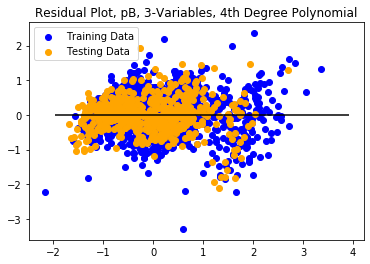

In [22]:
# Plot pB residuals based on 3-variable, RBF SVR model
model = SVR(kernel='poly', degree=4, C=10, gamma=0.01, epsilon=0.001, coef0 = 9.05769492931081)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pB, 3-Variables, 4th Degree Polynomial')

In [23]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [24]:
model = SVR(kernel='poly', degree=4, C=10, gamma=0.01, epsilon=0.001, coef0 = 9.05769492931081)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [25]:
daily_pB['Predicted_pB'] = y_predicted
daily_pB['Error'] = daily_pB['Predicted_pB'] - daily_pB['pB']
daily_pB.head()

,datestring,average_exhaustion,average_sA,average_percent_extracted_per_point,pB,Predicted_pB,Error
0,20090812,47.836660,0.236600,0.675676,1.556,1.381393,-0.174607
1,20090813,45.127344,0.239869,0.709220,1.324,1.396855,0.072855
2,20090814,46.250910,0.237382,0.649351,1.545,1.340455,-0.204545
3,20090815,47.276493,0.238790,0.657895,1.512,1.373233,-0.138767
4,20090816,45.022368,0.240766,0.617284,1.077,1.321682,0.244682


In [68]:
# Get a datetime column
from datetime import datetime
daily_pB['datestring'] = daily_pB['datestring'].astype(str)
datetime_list = []
for i in range(len(daily_pB)):
    datetime_list.append(datetime.strptime(daily_pB['datestring'][i],'%Y%m%d'))

In [69]:
daily_pB['datetime'] = datetime_list
daily_pB

,datestring,average_exhaustion,average_sA,average_percent_extracted_per_point,pB,Predicted_pB,Error,datetime
0,20090812,47.836660,0.236600,0.675676,1.556000,1.381393,-0.174607,2009-08-12
1,20090813,45.127344,0.239869,0.709220,1.324000,1.396855,0.072855,2009-08-13
2,20090814,46.250910,0.237382,0.649351,1.545000,1.340455,-0.204545,2009-08-14
3,20090815,47.276493,0.238790,0.657895,1.512000,1.373233,-0.138767,2009-08-15
4,20090816,45.022368,0.240766,0.617284,1.077000,1.321682,0.244682,2009-08-16
...,...,...,...,...,...,...,...,...
2329,20200320,91.697606,0.189014,0.666667,2.459333,2.761695,0.302362,2020-03-20
2330,20200323,92.262835,0.183232,0.613497,2.603000,2.680173,0.077173,2020-03-23
2331,20200324,91.541995,0.187317,0.564972,2.641500,2.755553,0.114053,2020-03-24
2332,20200325,80.328178,0.193251,0.574713,2.673500,2.430250,-0.243250,2020-03-25


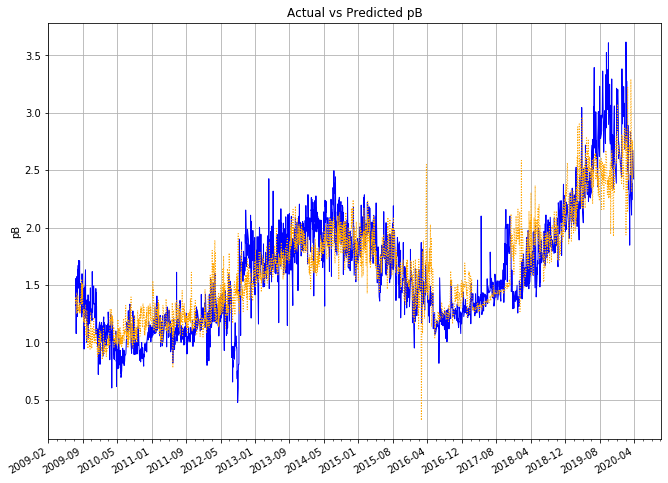

In [81]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pB['datetime'],daily_pB['pB'],c='blue',linewidth = 1)
ax1.plot(daily_pB['datetime'],daily_pB['Predicted_pB'],c='orange',linewidth = 1,linestyle=':')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pB')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pB')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/3-variable.png', dpi=100)
plt.show()